![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# ==============================================================================
from sklearn.datasets import load_iris

iris = load_iris()
datos=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [3]:
datos.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


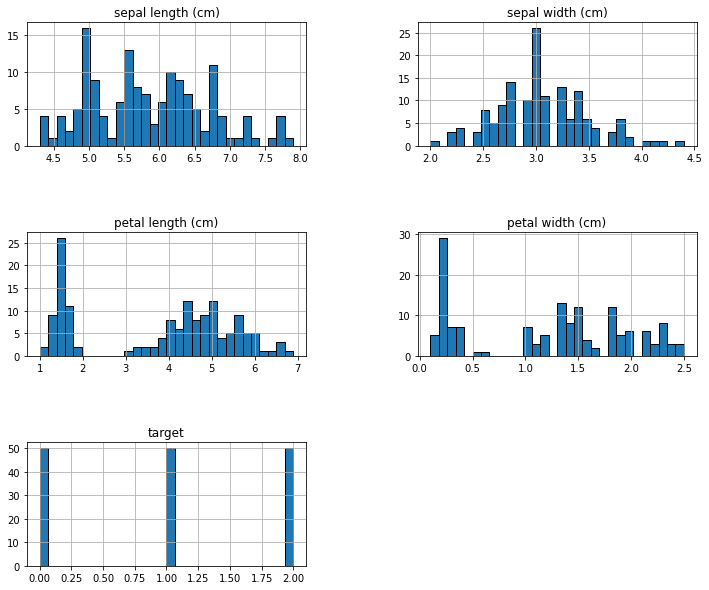

In [23]:
datos.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

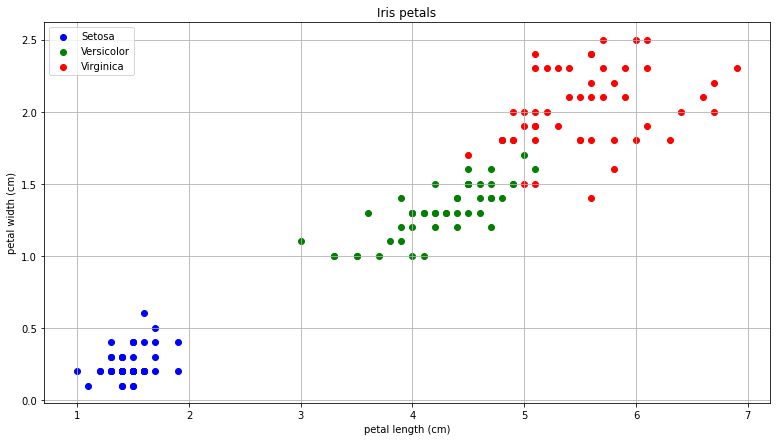

In [20]:
setosa = datos.loc[iris.target == 0, 'sepal length (cm)':'petal width (cm)']
versicolor = datos.loc[iris.target == 1, 'sepal length (cm)':'petal width (cm)']
virginica = datos.loc[iris.target == 2, 'sepal length (cm)':'petal width (cm)']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) 

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [24]:
# División de los datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

x = datos.drop(columns = 'target')
y = datos['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

# DecisionTree

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(splitter='random').fit(x_train,y_train)

In [27]:
y_pred = model.predict(x_test)
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2.])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.98

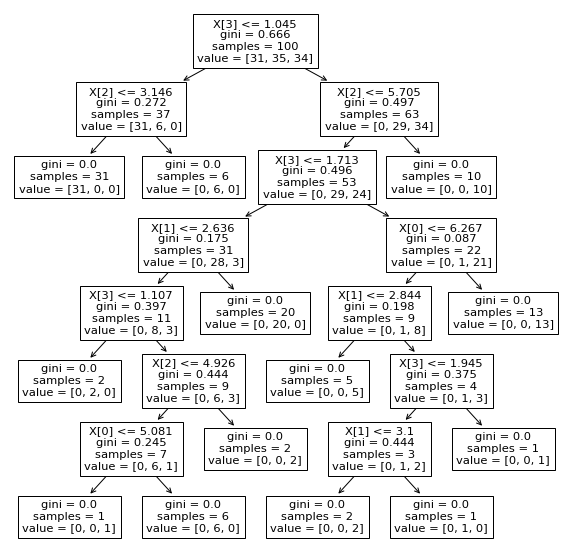

In [26]:
# Grafico
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

#RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5).fit(x_train,y_train)

In [32]:
y_pred = model.predict(x_test)

accuracy_score(y_test,y_pred)

0.98

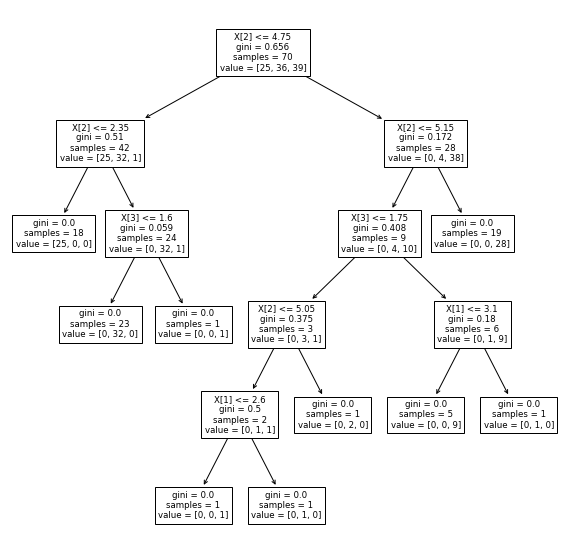

In [34]:
# Grafico
plt.figure(figsize=(10,10))
tree.plot_tree(model.estimators_[0])
plt.show()